In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 91.9MB/s]
100% 1.06G/1.06G [00:06<00:00, 168MB/s] 


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding='same',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding='same',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding='same',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 105ms/step - loss: 1.4321 - accuracy: 0.5723 - val_loss: 0.6402 - val_accuracy: 0.6360
Epoch 2/10
625/625 [==============================] - 63s 99ms/step - loss: 0.6301 - accuracy: 0.6413 - val_loss: 0.6267 - val_accuracy: 0.6902
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5751 - accuracy: 0.6909 - val_loss: 0.5158 - val_accuracy: 0.7522
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5046 - accuracy: 0.7458 - val_loss: 0.6651 - val_accuracy: 0.6304
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4452 - accuracy: 0.7824 - val_loss: 0.4571 - val_accuracy: 0.7830
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4040 - accuracy: 0.8120 - val_loss: 0.5286 - val_accuracy: 0.7540
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3384 - accuracy: 0.8432 - val_loss: 0.4507 - val_acc

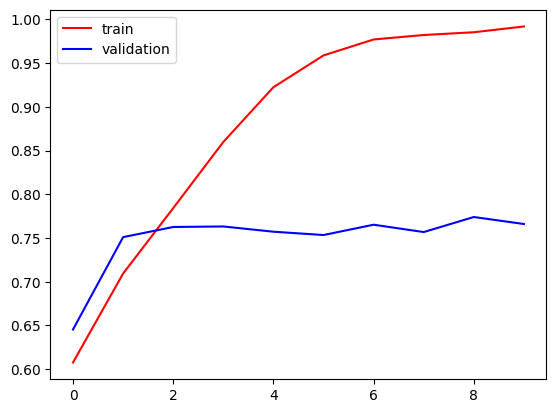

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

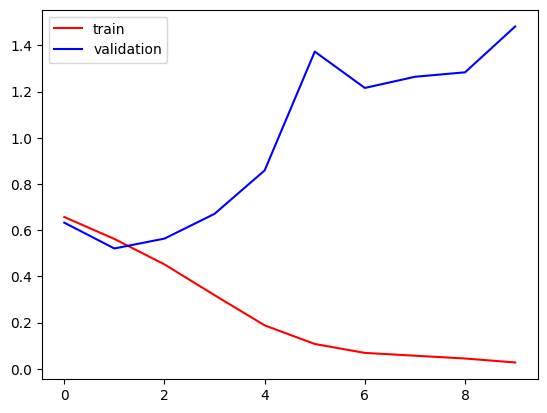

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()